<a href="https://colab.research.google.com/github/lharipriya/HDS-/blob/main/final/Haripriya_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

This project involves a detailed analysis of kidney mortality rates across the United States, utilizing data from the years 2015 and 2016. The primary goal is to identify trends and patterns in kidney-related deaths and how they vary by state. By merging historical mortality rate data with geographic information, the project aims to visualize these variations on a U.S. map, providing clear visual insights into regional disparities in kidney health outcomes. This analysis is crucial for public health officials and policymakers to understand the impact of healthcare accessibility, underlying demographics, and potential environmental factors affecting kidney health across different regions. The findings from this project could help in crafting targeted interventions aimed at reducing kidney mortality rates and improving overall public health strategies.

**Datasets Used**


Dataset 1: https://www.cdc.gov/nchs/pressroom/sosmap/kidney_disease_mortality/kidney_disease.htm

* The Centers for Disease Control and Prevention (CDC) provides a comprehensive overview of kidney disease mortality across the United States, updated for the year 2022. The data highlights age-adjusted death rates, categorized by state, ranging from the highest to lowest rates, offering a clear depiction of geographic disparities in kidney disease outcomes. This detailed data table, accessible through the CDC's website, not only shows numerical values such as death counts and rates per 100,000 population but also includes an interactive map to visualize these statistics. Such data is crucial for public health professionals and policymakers to identify high-risk areas, understand regional health challenges, and tailor interventions to reduce kidney disease mortality effectively

Dataset 2: : https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease

* The Chronic Kidney Disease dataset provides detailed medical data collected over two months from a hospital setting, aimed at predicting chronic kidney disease in patients. This dataset is characterized by 24 attributes including age, blood pressure, serum creatinine, and more, encompassing both numeric and nominal data types. With 400 instances, it supports tasks such as classification, where models can differentiate between patients with and without the disease. This dataset serves as an essential tool for medical researchers and data scientists focusing on improving diagnostic accuracy and patient outcomes in nephrology.

Dataset 3: https://www.faa.gov/air_traffic/publications/atpubs/cnt_html/appendix_a.html

* It lists two-letter abbreviations for each U.S. state and territory, facilitating standardized aviation and aeronautical communications. This reference is essential for ensuring clarity and consistency in the identification and documentation of geographic locations within various aeronautical and aviation-related reports and communications across the United States.


# **Import the datasets**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
chronic_kidney = pd.read_json("ChronicKidneyDisease.json")

In [ ]:
Kidney_Mortality = pd.read_excel("Kidney_Mortality_rate.xlsx")

Kidney_Mortality_2015 = Kidney_Mortality[Kidney_Mortality['YEAR']==2015]

Kidney_Mortality_2016 = Kidney_Mortality[Kidney_Mortality['YEAR']==2016]

In [ ]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\santo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
url = 'https://www.faa.gov/air_traffic/publications/atpubs/cnt_html/appendix_a.html'
tables = pd.read_html(url)
state_table = tables[0]

# **Data Transformations**

Here are some field level transformations to enhance data quality and ensure consistency. This process includes cleaning data to remove inaccuracies, standardizing formats for uniformity, converting text to numerical values where necessary, and normalizing values to align different scales. These adjustments are crucial for ensuring that the data is reliable and comparable, which is especially important when analyzing the data or integrating it with other datasets.

**Dataset 1**: Chronic kidney disease

In [ ]:
chronic_kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48,80,1.02,1,0,,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7,50,1.02,4,0,,normal,notpresent,notpresent,...,38,6000,,no,no,no,good,no,no,ckd
2,2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,...,31,7500,,no,yes,no,poor,no,yes,ckd
3,3,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
# Replace empty strings with NaN
chronic_kidney.replace('', np.nan, inplace=True)

# Remove rows with any NaN values across all columns
chronic_kidney.dropna(inplace=True)
chronic_kidney = chronic_kidney.dropna()

C:\Users\santo\AppData\Local\Temp\ipykernel_27432\2877845836.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  chronic_kidney.replace('', np.nan, inplace=True)


In [ ]:
chronic_kidney.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 3 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              158 non-null    int64  
 1   age             158 non-null    float64
 2   bp              158 non-null    float64
 3   sg              158 non-null    float64
 4   al              158 non-null    float64
 5   su              158 non-null    float64
 6   rbc             158 non-null    object 
 7   pc              158 non-null    object 
 8   pcc             158 non-null    object 
 9   ba              158 non-null    object 
 10  bgr             158 non-null    float64
 11  bu              158 non-null    float64
 12  sc              158 non-null    float64
 13  sod             158 non-null    float64
 14  pot             158 non-null    float64
 15  hemo            158 non-null    float64
 16  pcv             158 non-null    object 
 17  wc              158 non-null    object 


In [ ]:
chronic_kidney['age'] = chronic_kidney['age'].astype(int)
chronic_kidney['bp'] = chronic_kidney['bp'].astype(int)
chronic_kidney['sg'] = chronic_kidney['sg'].astype(int)
chronic_kidney['al'] = chronic_kidney['al'].astype(int)
chronic_kidney['su'] = chronic_kidney['su'].astype(int)
chronic_kidney['pcv'] = chronic_kidney['pcv'].astype(int)
chronic_kidney['wc'] = chronic_kidney['wc'].astype(int)

In [ ]:
categorical_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

# Convert the specified columns to categorical type
for col in categorical_cols:
    chronic_kidney[col] = chronic_kidney[col].astype('category')

In [ ]:
float_cols = ['bu', 'sc', 'sod', 'pot', 'hemo', 'rc']

# Convert the specified columns to categorical type
for col in float_cols:
    chronic_kidney[col] = chronic_kidney[col].astype(float)

**Dataset 2:** Kidney Mortality rate

In [ ]:
Kidney_Mortality_2015.head().reset_index(drop=True)

,YEAR,STATE,RATE,DEATHS,URL
0,2015,AL,18.4,1040,/nchs/pressroom/states/alabama/alabama.htm
1,2015,AK,10.0,50,/nchs/pressroom/states/alaska/alaska.htm
2,2015,AZ,5.5,458,/nchs/pressroom/states/arizona/arizona.htm
3,2015,AR,19.8,707,/nchs/pressroom/states/arkansas/arkansas.htm
4,2015,CA,8.6,3557,/nchs/pressroom/states/california/california.htm


In [ ]:
Kidney_Mortality_2015.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 351 to 400
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    50 non-null     int64  
 1   STATE   50 non-null     object 
 2   RATE    50 non-null     float64
 3   DEATHS  50 non-null     int64  
 4   URL     50 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ KB


In [ ]:
Kidney_Mortality_2015 = Kidney_Mortality_2015.drop('URL', axis=1)

In [ ]:
Kidney_Mortality_2015['STATE'] = Kidney_Mortality_2015['STATE'].astype('string')

In [ ]:
Kidney_Mortality_2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 301 to 350
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    50 non-null     int64  
 1   STATE   50 non-null     object 
 2   RATE    50 non-null     float64
 3   DEATHS  50 non-null     int64  
 4   URL     50 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ KB


In [ ]:
Kidney_Mortality_2016 = Kidney_Mortality_2016.drop('URL', axis=1)

In [ ]:
Kidney_Mortality_2016['STATE'] = Kidney_Mortality_2016['STATE'].astype('string')

**Dataset 3:** US States

In [ ]:
state_table

,STATE(TERRITORY),STATE(TERRITORY).1,STATE(TERRITORY).2,STATE(TERRITORY).3,STATE(TERRITORY).4,STATE(TERRITORY).5
0,Alabama,AL,Kentucky,KY,Ohio,OH
1,Alaska,AK,Louisiana,LA,Oklahoma,OK
2,Arizona,AZ,Maine,ME,Oregon,OR
3,Arkansas,AR,Maryland,MD,Pennsylvania,PA
4,American Samoa,AS,Massachusetts,MA,Puerto Rico,PR
5,California,CA,Michigan,MI,Rhode Island,RI
6,Colorado,CO,Minnesota,MN,South Carolina,SC
7,Connecticut,CT,Mississippi,MS,South Dakota,SD
8,Delaware,DE,Missouri,MO,Tennessee,TN
9,District of Columbia,DC,Montana,MT,Texas,TX


In [ ]:
# Flattening the DataFrame into a single list of values
flat_list = state_table.values.flatten()

# Reshaping into a 2-column DataFrame: One for state names, one for abbreviations
# Since the list alternates between state name and abbreviation, use slicing
US_States = pd.DataFrame({
    'State': flat_list[::2],
    'Abbreviation': flat_list[1::2]
})

In [ ]:
US_States.head()

,State,Abbreviation
0,Alabama,AL
1,Kentucky,KY
2,Ohio,OH
3,Alaska,AK
4,Louisiana,LA


# **Data Merging**

**Merge datasets Kidney_Mortality_2015 and Kidney_Mortality_2016**

In [ ]:
Kidney_Mortality_data = pd.merge(Kidney_Mortality_2015, Kidney_Mortality_2016, on='STATE', suffixes=('_2015', '_2016'))

# Check the merged DataFrame
Kidney_Mortality_data.head()

,YEAR_2015,STATE,RATE_2015,DEATHS_2015,YEAR_2016,RATE_2016,DEATHS_2016
0,2015,AL,18.4,1040,2016,17.4,1012
1,2015,AK,10.0,50,2016,10.0,53
2,2015,AZ,5.5,458,2016,5.7,487
3,2015,AR,19.8,707,2016,20.0,722
4,2015,CA,8.6,3557,2016,8.6,3640


In [ ]:
Kidney_Mortality_data = Kidney_Mortality_data.drop(['YEAR_2015', 'YEAR_2016'], axis=1)

**Merge Kidney_Mortality_data and US_States**

In [ ]:
# Renaming the 'Abbreviation' column in US_States to 'STATE' for a consistent merge key
US_States.rename(columns={'Abbreviation': 'STATE'}, inplace=True)

# Merging the DataFrames on the 'STATE' column
Kidney_Mortality_merged = pd.merge(US_States, Kidney_Mortality_data, on='STATE', how='inner')

In [ ]:
Kidney_Mortality_merged.rename(columns={'STATE': 'Abbrevation'}, inplace=True)

In [ ]:
Kidney_Mortality_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        50 non-null     object 
 1   Abbrevation  50 non-null     object 
 2   RATE_2015    50 non-null     float64
 3   DEATHS_2015  50 non-null     int64  
 4   RATE_2016    50 non-null     float64
 5   DEATHS_2016  50 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 2.5+ KB


In [ ]:
Kidney_Mortality_merged

,State,Abbrevation,RATE_2015,DEATHS_2015,RATE_2016,DEATHS_2016
0,Alabama,AL,18.4,1040,17.4,1012
1,Kentucky,KY,19.7,998,20.3,1034
2,Ohio,OH,14.5,2100,15.4,2262
3,Alaska,AK,10.0,50,10.0,53
4,Louisiana,LA,23.2,1160,22.6,1153
5,Oklahoma,OK,14.2,616,12.9,577
6,Arizona,AZ,5.5,458,5.7,487
7,Maine,ME,11.4,211,12.4,239
8,Oregon,OR,8.2,409,7.7,398
9,Arkansas,AR,19.8,707,20.0,722


# **Data Aggregation and Pivoting**

**Year-on-Year change in rates and deaths**

This below pivot table helps to track changes in kidney mortality rates and deaths across various states from 2015 to 2016. It calculates the differences in rates and deaths for each state, summarizing them to show whether these figures have increased or decreased over the year. This analysis is particularly useful for assessing the effectiveness of health interventions and for prioritizing healthcare resources in areas with significant changes.

In [ ]:
# Calculating year-on-year change in rates and deaths
Kidney_Mortality_data['Rate Change'] = Kidney_Mortality_data['RATE_2016'] - Kidney_Mortality_data['RATE_2015']
Kidney_Mortality_data['Deaths Change'] = Kidney_Mortality_data['DEATHS_2016'] - Kidney_Mortality_data['DEATHS_2015']

pivot_table = Kidney_Mortality_data.pivot_table(
    values=['Rate Change', 'Deaths Change'],
    index='STATE',
    aggfunc='sum'
)

# Displaying the pivot table
pivot_table

,Deaths Change,Rate Change
STATE,,
AK,3,0.0
AL,-28,-1.0
AR,15,0.2
AZ,29,0.2
CA,83,0.0
CO,33,0.4
CT,-14,0.0
DE,34,2.6
FL,-59,-0.6


**Nationwide summary:**

This below pivot table is nationwide summary which calculates and displays key statistics for kidney mortality rates across the United States for the years 2015 and 2016. By using the .agg() method to determine the mean and standard deviation for each year, the summary provides a clear snapshot of the average mortality rate and its variability among the states. This information is crucial for health officials and policymakers as it aids in assessing the overall effectiveness of healthcare interventions over time and identifying trends or potential areas of concern in public health management.

In [ ]:
# Nationwide summary using the .agg() method to compute overall statistics
nationwide_summary = Kidney_Mortality_data.agg({
    'RATE_2015': ['mean', 'std'],
    'RATE_2016': ['mean', 'std']
})

# Displaying the nationwide summary
nationwide_summary

,RATE_2015,RATE_2016
mean,13.400000,13.140000
std,4.474371,4.464006


**Average values by Anemia status:**

The pivot table created for analyzing average blood and biochemical parameters by anemia status provides a focused overview of key health indicators related to blood composition in patients classified based on their anemia condition. By segmenting data into groups determined by the presence or absence of anemia (ane), this table summarizes the average values of hemoglobin (hemo), packed cell volume (pcv), and red cell count (rc).

In [ ]:
# Creating a pivot table for average blood and biochemical parameters by anemia status
pivot_anemia = chronic_kidney.pivot_table(
    values=['hemo', 'pcv', 'rc'],  # Hemoglobin, Packed Cell Volume, and Red Cell Count
    index='ane',  # Anemia status
    aggfunc='mean',
    observed=False
)

# Displaying the pivot table for Anemia
print("Average values by Anemia status:")
pivot_anemia

Average values by Anemia status:


,hemo,pcv,rc
ane,,,
no,14.30493,43.915493,5.090141
yes,8.20625,24.187500,3.131250


**Distribution by Kidney Disease Classification**

This pivot table categorizes kidney disease patients and summarizes their specific gravity, albumin, and sugar levels. By comparing mean, maximum, and minimum values across disease classifications, it helps clinicians diagnose and manage kidney disease more effectively.

In [ ]:
pivot_classification = chronic_kidney.pivot_table(
    values=['sg', 'al', 'su'],  # Specific Gravity, Albumin, and Sugar levels
    index='classification',  # Classification of kidney disease
    aggfunc=['mean', 'max', 'min'],
    observed=False  # Explicitly setting observed to False to maintain current behavior
)

# Displaying the pivot table for Kidney Disease Classification
print("Parameter distribution by Kidney Disease Classification:")
pivot_classification

Parameter distribution by Kidney Disease Classification:


mean                max       min      
                      al   sg        su  al sg su  al sg su
classification                                             
ckd             2.930233  1.0  0.930233   4  1  5   0  1  0
notckd          0.000000  1.0  0.000000   0  1  0   0  1  0

# **Data Visualizations**

**Age distribution of CKD patients**

This histogram visualizes the age distribution of patients with Chronic Kidney Disease (CKD), highlighting the concentration of cases within specific age ranges and providing a clear view of the demographic most affected by this condition.

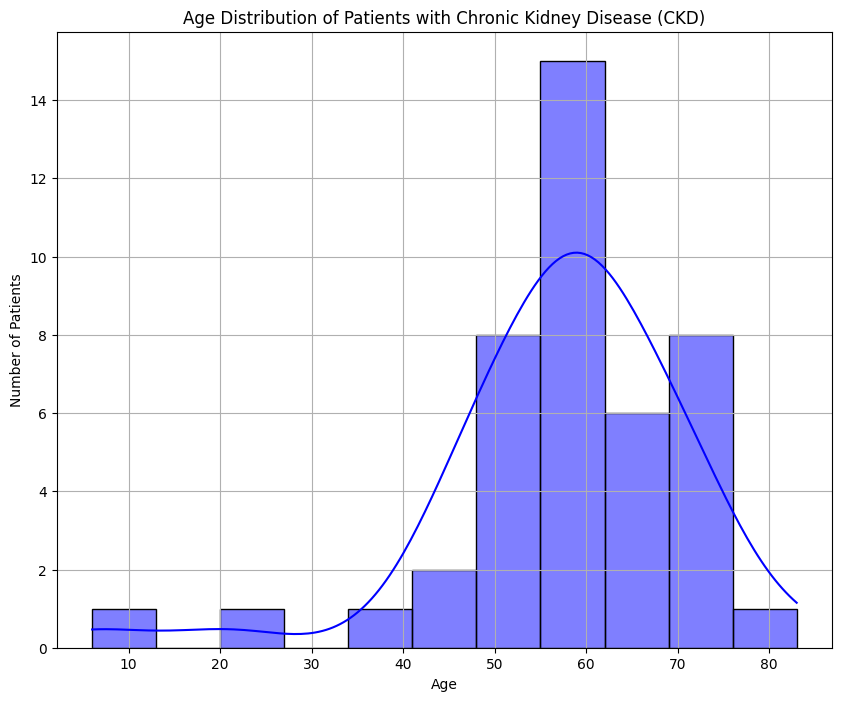

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset for patients with CKD classification
ckd_patients = chronic_kidney[chronic_kidney['classification'] == 'ckd']

# Visualizing the age distribution of CKD patients
plt.figure(figsize=(10, 8))
sns.histplot(ckd_patients['age'],color='blue', kde=True)
plt.title('Age Distribution of Patients with Chronic Kidney Disease (CKD)')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.show()


This visualization uses a violin plot to compare the distribution of blood pressure across different kidney disease classifications. It highlights the range, density, and quartiles of blood pressure values for each classification, providing insights into how blood pressure varies with disease severity.

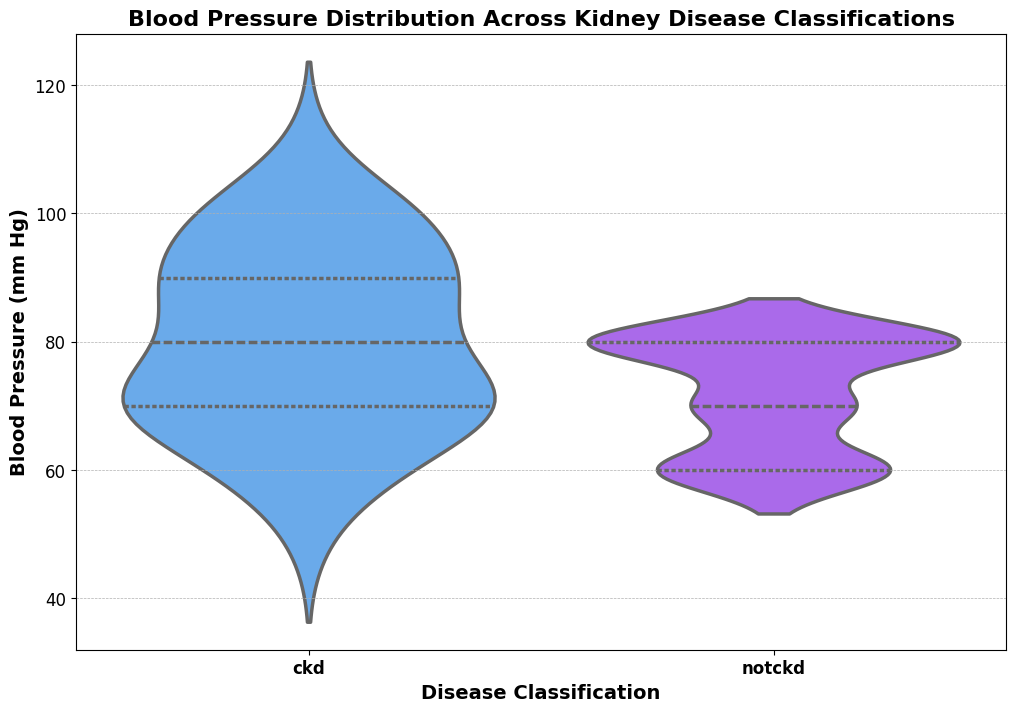

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='classification', y='bp', data=chronic_kidney,
               inner='quartile',
               linewidth=2.5,
               hue='classification',
               palette="cool",
               density_norm='width',
               legend=False)

# Adding title and labels with enhanced fonts
plt.title('Blood Pressure Distribution Across Kidney Disease Classifications', fontsize=16, fontweight='bold')
plt.xlabel('Disease Classification', fontsize=14, fontweight='bold')
plt.ylabel('Blood Pressure (mm Hg)', fontsize=14, fontweight='bold')

# Improve tick visibility
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

# Add a slight horizontal grid for easier reading
plt.grid(True, linestyle='--', linewidth=0.5, axis='y')

# Show the plot
plt.show()

**Relationship between hemoglobin levels and packed cell volume**

This scatter plot describes the relationship between hemoglobin levels and packed cell volume among kidney disease patients, differentiated by disease classification. By plotting these two crucial blood parameters, the graph visually explores how variations in hemoglobin correlate with changes in packed cell volume across different types of kidney disease.

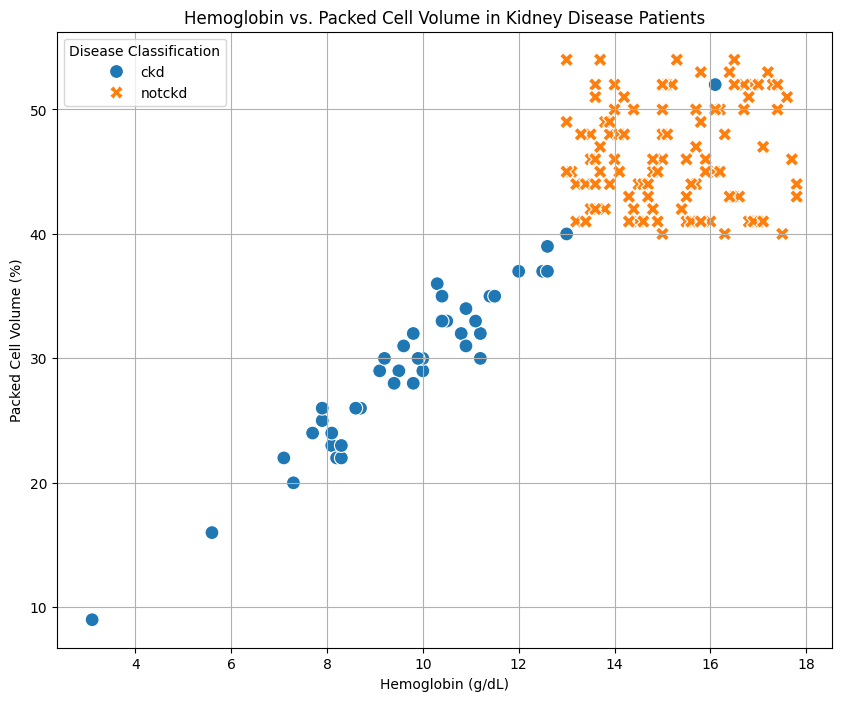

In [ ]:
# Scatter plot to explore the relationship between hemoglobin levels and packed cell volume
plt.figure(figsize=(10, 8))
sns.scatterplot(x='hemo', y='pcv', data=chronic_kidney, hue='classification', style='classification', s=100)
plt.title('Hemoglobin vs. Packed Cell Volume in Kidney Disease Patients')
plt.xlabel('Hemoglobin (g/dL)')
plt.ylabel('Packed Cell Volume (%)')
plt.legend(title='Disease Classification')
plt.grid(True)
plt.show()


In [ ]:
pip install geopandas plotly

   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ----------- ---------------------------- 92.2/323.6 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   -- ------------------------------------- 0.8/16.2 MB 26.4 MB/s eta 0:00:01
   ---- ----------------------------------- 2.0/16.2 MB 25.6 MB/s eta 0:00:01
   ---------- ----------------------------- 4.0/16.2 MB 32.3 MB/s eta 0:00:01
   -------------- ------------------------- 5.8/16.2 MB 33.8 MB/s eta 0:00:01
   ------------------ --------------------- 7.3/16.2 MB 33.4 MB/s eta 0:00:01
   --------------------- ------------------ 8.8/16.2 MB 35.1 MB/s eta 0:00:01
   -------------------------- ------------- 10.9/16.2 MB 38.5 MB/s eta 0:00:01
   -------------------------------- ------- 13.1/16.2 MB 43.7 MB/s eta 0:00:01
   -------------------------------------- - 15.5/16.2 MB 46.7 MB/s eta 0:0


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\santo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


The map visualizes kidney mortality rates in the U.S. for 2015, with states color-coded based on the number of deaths. The choropleth map provides a geographic representation of mortality across states to highlight regions with higher or lower mortality rates.

In [ ]:
import plotly.express as px

# Create a choropleth map for DEATHS_2015
fig = px.choropleth(Kidney_Mortality_merged,
                    locations='Abbrevation',
                    color='DEATHS_2015',
                    hover_name='State',
                    color_continuous_scale='Viridis',
                    locationmode='USA-states',
                    title="Kidney Mortality in 2015 by State")

# Update layout to focus on the US
fig.update_geos(
    visible=True,
    lakecolor='white',
    projection_type="albers usa",
    scope='usa',
)

# Update title and layout
fig.update_layout(
    title_text="Kidney Mortality in 2015 by State",
    geo=dict(showcoastlines=True, coastlinecolor="Black")
)

# Show the plot
fig.show()


# **Conclusion**

The project focuses on studying kidney disease deaths across the U.S. using maps and charts to show where and how often they occur. This helps us understand which areas need more healthcare support. While this study specifically looks at kidney disease, the methods used here could help with other health issues too. By showing how to use data to spot health trends and problems, this project could guide better decisions in healthcare and other industries, making it a valuable tool for improving how we manage and prevent diseases. It also showcases how analyzing health data can lead to more informed public health strategies, ensuring resources are used efficiently to tackle major health challenges effectively.